
<a id='pd'></a>
<div id="qe-notebook-header" align="right" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" width="250px" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Pandas


<a id='index-1'></a>

## Contents

- [Pandas](#Pandas)  
  - [Overview](#Overview)  
  - [Series](#Series)  
  - [DataFrames](#DataFrames)  
  - [On-Line Data Sources](#On-Line-Data-Sources)  
  - [Exercises](#Exercises)  
  - [Solutions](#Solutions)  

In addition to what’s in Anaconda, this lecture will need the following libraries:

In [1]:
!pip install --upgrade pandas-datareader
!pip install --upgrade yfinance

You should consider upgrading via the '/Users/fabrizio/opt/anaconda3/bin/python -m pip install --upgrade pip' command.
You should consider upgrading via the '/Users/fabrizio/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


## Overview

[Pandas](http://pandas.pydata.org/) is a package of fast, efficient data analysis tools for Python.

Its popularity has surged in recent years, coincident with the rise
of fields such as data science and machine learning.

Here’s a popularity comparison over time against Matlab and STATA courtesy of Stack Overflow Trends

![https://python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_vs_rest.png](https://python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_vs_rest.png)

  
Just as [NumPy](http://www.numpy.org/) provides the basic array data type plus core array operations, pandas

1. defines fundamental structures for working with data and  
1. endows them with methods that facilitate operations such as  
  - reading in data  
  - adjusting indices  
  - working with dates and time series  
  - sorting, grouping, re-ordering and general data munging <sup><a href=#mung id=mung-link>[1]</a></sup>  
  - dealing with missing values, etc., etc.  


More sophisticated statistical functionality is left to other packages, such
as [statsmodels](http://www.statsmodels.org/) and [scikit-learn](http://scikit-learn.org/), which are built on top of pandas.

This lecture will provide a basic introduction to pandas.

Throughout the lecture, we will assume that the following imports have taken
place

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [10,8]  # Set default figure size
import requests

## Series


<a id='index-2'></a>
Two important data types defined by pandas are  `Series` and `DataFrame`.

You can think of a `Series` as a “column” of data, such as a collection of observations on a single variable.

A `DataFrame` is an object for storing related columns of data.

Let’s start with Series

In [3]:
s = pd.Series(np.random.randn(4), name='daily returns')
s

0   -0.168940
1   -0.349745
2    1.092583
3    0.747071
Name: daily returns, dtype: float64

Here you can imagine the indices `0, 1, 2, 3` as indexing four listed
companies, and the values being daily returns on their shares.

Pandas `Series` are built on top of NumPy arrays and support many similar
operations

In [4]:
s * 100

0    -16.893963
1    -34.974549
2    109.258284
3     74.707106
Name: daily returns, dtype: float64

In [5]:
np.abs(s)

0    0.168940
1    0.349745
2    1.092583
3    0.747071
Name: daily returns, dtype: float64

But `Series` provide more than NumPy arrays.

Not only do they have some additional (statistically oriented) methods

In [6]:
s.describe()

count    4.000000
mean     0.330242
std      0.699160
min     -0.349745
25%     -0.214141
50%      0.289066
75%      0.833449
max      1.092583
Name: daily returns, dtype: float64

But their indices are more flexible

In [7]:
s.index = ['AMZN', 'AAPL', 'MSFT', 'GOOG']
s

AMZN   -0.168940
AAPL   -0.349745
MSFT    1.092583
GOOG    0.747071
Name: daily returns, dtype: float64

Viewed in this way, `Series` are like fast, efficient Python dictionaries
(with the restriction that the items in the dictionary all have the same
type—in this case, floats).

In fact, you can use much of the same syntax as Python dictionaries

In [8]:
s['AMZN']

-0.1689396273918691

In [9]:
s['AMZN'] = 0
s

AMZN    0.000000
AAPL   -0.349745
MSFT    1.092583
GOOG    0.747071
Name: daily returns, dtype: float64

In [10]:
'AAPL' in s

True

## DataFrames


<a id='index-3'></a>
While a `Series` is a single column of data, a `DataFrame` is several columns, one for each variable.

In essence, a `DataFrame` in pandas is analogous to a (highly optimized) Excel spreadsheet.

Thus, it is a powerful tool for representing and analyzing data that are naturally organized  into rows and columns, often with  descriptive indexes for individual rows and individual columns.

Let’s look at an example that reads data from the CSV file `pandas/data/test_pwt.csv`, which is taken from the Penn World Tables.

Here’s the content of `test_pwt.csv`

```text
"country","country isocode","year","POP","XRAT","tcgdp","cc","cg"
"Argentina","ARG","2000","37335.653","0.9995","295072.21869","75.716805379","5.5788042896"
"Australia","AUS","2000","19053.186","1.72483","541804.6521","67.759025993","6.7200975332"
"India","IND","2000","1006300.297","44.9416","1728144.3748","64.575551328","14.072205773"
"Israel","ISR","2000","6114.57","4.07733","129253.89423","64.436450847","10.266688415"
"Malawi","MWI","2000","11801.505","59.543808333","5026.2217836","74.707624181","11.658954494"
"South Africa","ZAF","2000","45064.098","6.93983","227242.36949","72.718710427","5.7265463933"
"United States","USA","2000","282171.957","1","9898700","72.347054303","6.0324539789"
"Uruguay","URY","2000","3219.793","12.099591667","25255.961693","78.978740282","5.108067988"
```


We’ll read this in from a URL using the `pandas` function `read_csv`.

In [11]:
df = pd.read_csv('https://raw.githubusercontent.com/QuantEcon/lecture-python-programming/master/source/_static/lecture_specific/pandas/data/test_pwt.csv')
type(df)

pandas.core.frame.DataFrame

In [12]:
df

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
0,Argentina,ARG,2000,37335.653,0.999500,2.950722e+05,75.716805,5.578804
1,Australia,AUS,2000,19053.186,1.724830,5.418047e+05,67.759026,6.720098
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954
5,South Africa,ZAF,2000,45064.098,6.939830,2.272424e+05,72.718710,5.726546
6,United States,USA,2000,282171.957,1.000000,9.898700e+06,72.347054,6.032454
7,Uruguay,URY,2000,3219.793,12.099592,2.525596e+04,78.978740,5.108068


We can select particular rows using standard Python array slicing notation

In [13]:
df[2:5]

,country,country isocode,year,POP,XRAT,tcgdp,cc,cg
2,India,IND,2000,1006300.297,44.941600,1.728144e+06,64.575551,14.072206
3,Israel,ISR,2000,6114.570,4.077330,1.292539e+05,64.436451,10.266688
4,Malawi,MWI,2000,11801.505,59.543808,5.026222e+03,74.707624,11.658954


To select columns, we can pass a list containing the names of the desired columns represented as strings

In [14]:
df[['country', 'tcgdp']]

,country,tcgdp
0,Argentina,2.950722e+05
1,Australia,5.418047e+05
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03
5,South Africa,2.272424e+05
6,United States,9.898700e+06
7,Uruguay,2.525596e+04


To select both rows and columns using integers, the `iloc` attribute should be used with the format `.iloc[rows, columns]`

In [15]:
df.iloc[2:5, 0:4]

,country,country isocode,year,POP
2,India,IND,2000,1006300.297
3,Israel,ISR,2000,6114.570
4,Malawi,MWI,2000,11801.505


To select rows and columns using a mixture of integers and labels, the `loc` attribute can be used in a similar way

In [16]:
df.loc[df.index[2:5], ['country', 'tcgdp']]

,country,tcgdp
2,India,1.728144e+06
3,Israel,1.292539e+05
4,Malawi,5.026222e+03


Let’s imagine that we’re only interested in population (`POP`) and total GDP (`tcgdp`).

One way to strip the data frame `df` down to only these variables is to overwrite the dataframe using the selection method described above

In [17]:
df = df[['country', 'POP', 'tcgdp']]
df

,country,POP,tcgdp
0,Argentina,37335.653,2.950722e+05
1,Australia,19053.186,5.418047e+05
2,India,1006300.297,1.728144e+06
3,Israel,6114.570,1.292539e+05
4,Malawi,11801.505,5.026222e+03
5,South Africa,45064.098,2.272424e+05
6,United States,282171.957,9.898700e+06
7,Uruguay,3219.793,2.525596e+04


Here the index `0, 1,..., 7` is redundant because we can use the country names as an index.

To do this, we set the index to be the `country` variable in the dataframe

In [18]:
df = df.set_index('country')
df

,POP,tcgdp
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Let’s give the columns slightly better names

In [19]:
df.columns = 'population', 'total GDP'
df

,population,total GDP
country,,
Argentina,37335.653,2.950722e+05
Australia,19053.186,5.418047e+05
India,1006300.297,1.728144e+06
Israel,6114.570,1.292539e+05
Malawi,11801.505,5.026222e+03
South Africa,45064.098,2.272424e+05
United States,282171.957,9.898700e+06
Uruguay,3219.793,2.525596e+04


Population is in thousands, let’s revert to single units

In [20]:
df['population'] = df['population'] * 1e3
df

,population,total GDP
country,,
Argentina,3.733565e+07,2.950722e+05
Australia,1.905319e+07,5.418047e+05
India,1.006300e+09,1.728144e+06
Israel,6.114570e+06,1.292539e+05
Malawi,1.180150e+07,5.026222e+03
South Africa,4.506410e+07,2.272424e+05
United States,2.821720e+08,9.898700e+06
Uruguay,3.219793e+06,2.525596e+04


Next, we’re going to add a column showing real GDP per capita, multiplying by 1,000,000 as we go because total GDP is in millions

In [21]:
df['GDP percap'] = df['total GDP'] * 1e6 / df['population']
df

,population,total GDP,GDP percap
country,,,
Argentina,3.733565e+07,2.950722e+05,7903.229085
Australia,1.905319e+07,5.418047e+05,28436.433261
India,1.006300e+09,1.728144e+06,1717.324719
Israel,6.114570e+06,1.292539e+05,21138.672749
Malawi,1.180150e+07,5.026222e+03,425.896679
South Africa,4.506410e+07,2.272424e+05,5042.647686
United States,2.821720e+08,9.898700e+06,35080.381854
Uruguay,3.219793e+06,2.525596e+04,7843.970620


One of the nice things about pandas `DataFrame` and `Series` objects is that they have methods for plotting and visualization that work through Matplotlib.

For example, we can easily generate a bar plot of GDP per capita

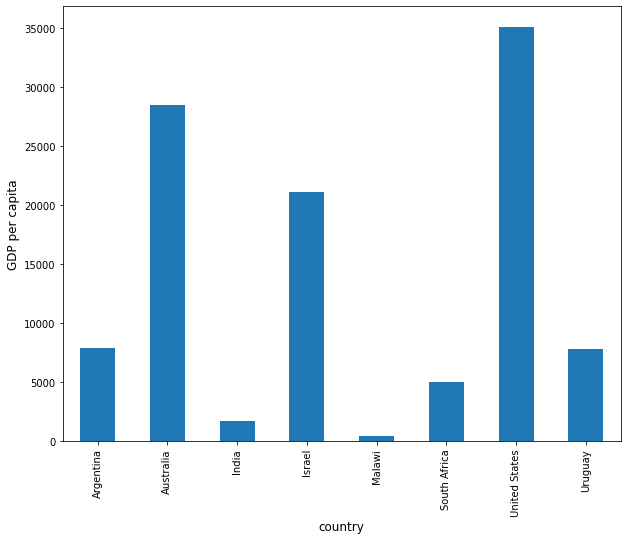

In [22]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

At the moment the data frame is ordered alphabetically on the countries—let’s change it to GDP per capita

In [23]:
df = df.sort_values(by='GDP percap', ascending=False)
df

,population,total GDP,GDP percap
country,,,
United States,2.821720e+08,9.898700e+06,35080.381854
Australia,1.905319e+07,5.418047e+05,28436.433261
Israel,6.114570e+06,1.292539e+05,21138.672749
Argentina,3.733565e+07,2.950722e+05,7903.229085
Uruguay,3.219793e+06,2.525596e+04,7843.970620
South Africa,4.506410e+07,2.272424e+05,5042.647686
India,1.006300e+09,1.728144e+06,1717.324719
Malawi,1.180150e+07,5.026222e+03,425.896679


Plotting as before now yields

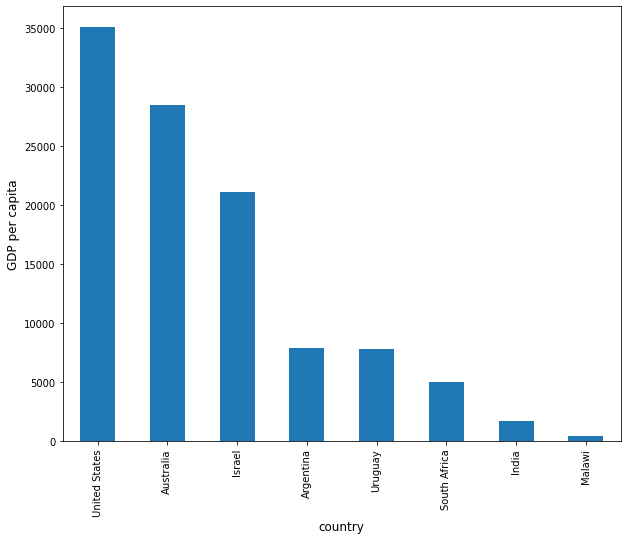

In [24]:
ax = df['GDP percap'].plot(kind='bar')
ax.set_xlabel('country', fontsize=12)
ax.set_ylabel('GDP per capita', fontsize=12)
plt.show()

## On-Line Data Sources


<a id='index-4'></a>
Python makes it straightforward to query online databases programmatically.

An important database for economists is [FRED](https://research.stlouisfed.org/fred2/) — a vast collection of time series data maintained by the St. Louis Fed.

For example, suppose that we are interested in the [unemployment rate](https://research.stlouisfed.org/fred2/series/UNRATE).

Via FRED, the entire series for the US civilian unemployment rate can be downloaded directly by entering
this URL into your browser (note that this requires an internet connection)

```text
https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv
```


(Equivalently, click here: [https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv](https://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv))

This request returns a CSV file, which will be handled by your default application for this class of files.

Alternatively, we can access the CSV file from within a Python program.

This can be done with a variety of methods.

We start with a relatively low-level method and then return to pandas.

### Accessing Data with requests


<a id='index-6'></a>
One option is to use [requests](https://requests.readthedocs.io/en/master/), a standard Python library for requesting data over the Internet.

To begin, try the following code on your computer

In [25]:
r = requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')

If there’s no error message, then the call has succeeded.

If you do get an error, then there are two likely causes

1. You are not connected to the Internet — hopefully, this isn’t the case.  
1. Your machine is accessing the Internet through a proxy server, and Python isn’t aware of this.  


In the second case, you can either

- switch to another machine  
- solve your proxy problem by reading [the documentation](https://requests.readthedocs.io/en/master/)  


Assuming that all is working, you can now proceed to use the `source` object returned by the call `requests.get('http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv')`

In [26]:
url = 'http://research.stlouisfed.org/fred2/series/UNRATE/downloaddata/UNRATE.csv'
source = requests.get(url).content.decode().split("\n")
source[0]

'DATE,VALUE\r'

In [27]:
source[1]

'1948-01-01,3.4\r'

In [28]:
source[2]

'1948-02-01,3.8\r'

We could now write some additional code to parse this text and store it as an array.

But this is unnecessary — pandas’ `read_csv` function can handle the task for us.

We use `parse_dates=True` so that pandas recognizes our dates column, allowing for simple date filtering

In [29]:
data = pd.read_csv(url, index_col=0, parse_dates=True)

The data has been read into a pandas DataFrame called `data` that we can now manipulate in the usual way

In [30]:
type(data)

pandas.core.frame.DataFrame

In [31]:
data.head()  # A useful method to get a quick look at a data frame

,VALUE
DATE,
1948-01-01,3.4
1948-02-01,3.8
1948-03-01,4.0
1948-04-01,3.9
1948-05-01,3.5


In [32]:
pd.set_option('display.precision', 1)
data.describe()  # Your output might differ slightly

,VALUE
count,895.0
mean,5.7
std,1.7
min,2.5
25%,4.5
50%,5.5
75%,6.8
max,14.7


We can also plot the unemployment rate from 2006 to 2012 as follows

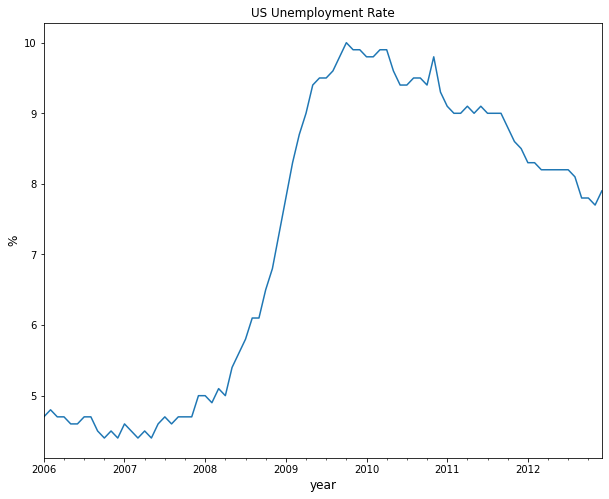

In [33]:
ax = data['2006':'2012'].plot(title='US Unemployment Rate', legend=False)
ax.set_xlabel('year', fontsize=12)
ax.set_ylabel('%', fontsize=12)
plt.show()

Note that pandas offers many other file type alternatives.

Pandas has [a wide variety](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) of top-level methods that we can use to read, excel, json, parquet or plug straight into a database server.

### Using pandas_datareader and yfinance to Access Data


<a id='index-9'></a>
The maker of pandas has also authored a library called
[pandas_datareader](https://pandas-datareader.readthedocs.io/en/latest/) that
gives programmatic access to many data sources straight from the Jupyter notebook.

While some sources require an access key, many of the most important (e.g., FRED, [OECD](https://data.oecd.org/), [EUROSTAT](https://ec.europa.eu/eurostat/data/database) and the World Bank) are free to use.

We will also use [yfinance](https://pypi.org/project/yfinance/) to fetch data from Yahoo finance
in the exercises.

For now let’s work through one example of downloading and plotting data — this
time from the World Bank.

>**Note**
>
>There are also other [python libraries](https://data.worldbank.org/products/third-party-apps)
available for working with world bank data such as [wbgapi](https://pypi.org/project/wbgapi/)

The World Bank [collects and organizes data](http://data.worldbank.org/indicator) on a huge range of indicators.

For example, [here’s](http://data.worldbank.org/indicator/GC.DOD.TOTL.GD.ZS/countries) some data on government debt as a ratio to GDP.

The next code example fetches the data for you and plots time series for the US and Australia

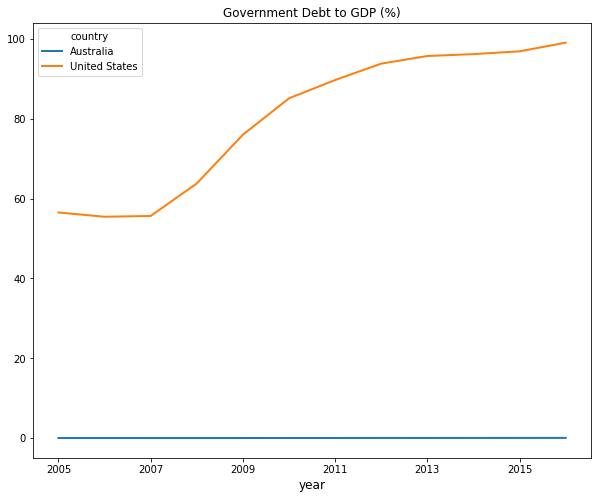

In [34]:
from pandas_datareader import wb

govt_debt = wb.download(indicator='GC.DOD.TOTL.GD.ZS', country=['US', 'AU'], start=2005, end=2016).stack().unstack(0)
ind = govt_debt.index.droplevel(-1)
govt_debt.index = ind
ax = govt_debt.plot(lw=2)
ax.set_xlabel('year', fontsize=12)
plt.title("Government Debt to GDP (%)")
plt.show()

The [documentation](https://pandas-datareader.readthedocs.io/en/latest/index.html) provides more details on how to access various data sources.

## Exercises

## Exercise 14.1

With these imports:

In [35]:
import datetime as dt
import yfinance as yf

Write a program to calculate the percentage price change over 2019 for the following shares:

In [36]:
ticker_list = {'INTC': 'Intel',
               'MSFT': 'Microsoft',
               'IBM': 'IBM',
               'BHP': 'BHP',
               'TM': 'Toyota',
               'AAPL': 'Apple',
               'AMZN': 'Amazon',
               'BA': 'Boeing',
               'QCOM': 'Qualcomm',
               'KO': 'Coca-Cola',
               'GOOG': 'Google',
               'SNE': 'Sony',
               'PTR': 'PetroChina'}

Here’s the first part of the program

In [37]:
def read_data(ticker_list,
          start=dt.datetime(2019, 1, 2),
          end=dt.datetime(2019, 12, 31)):
    """
    This function reads in closing price data from Yahoo
    for each tick in the ticker_list.
    """
    ticker = pd.DataFrame()

    for tick in ticker_list:
        stock = yf.Ticker(tick)
        prices = stock.history(start=start, end=end)
        closing_prices = prices['Close']
        ticker[tick] = closing_prices

    return ticker

ticker = read_data(ticker_list)

- SNE: No data found, symbol may be delisted


Complete the program to plot the result as a bar graph like this one:

![https://python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_share_prices.png](https://python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_share_prices.png)

## Exercise 14.2

Using the method `read_data` introduced in Exercise 14.1, write a program to obtain year-on-year percentage change for the following indices:

In [38]:
indices_list = {'^GSPC': 'S&P 500',
               '^IXIC': 'NASDAQ',
               '^DJI': 'Dow Jones',
               '^N225': 'Nikkei'}

Complete the program to show summary statistics and plot the result as a time series graph like this one:

![https://python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_indices_pctchange.png](https://python-programming.quantecon.org/_static/lecture_specific/pandas/pandas_indices_pctchange.png)

## Solutions

## Solution to[ Exercise 14.1](https://python-programming.quantecon.org/#pd_ex1)

There are a few ways to approach this problem using Pandas to calculate
the percentage change.

First, you can extract the data and perform the calculation such as:

In [39]:
p1 = ticker.iloc[0]    #Get the first set of prices as a Series
p2 = ticker.iloc[-1]   #Get the last set of prices as a Series
price_change = (p2 - p1) / p1 * 100
price_change

INTC    29.8
MSFT    58.1
IBM     20.8
BHP     25.6
TM      20.9
AAPL    87.4
AMZN    20.0
BA       3.1
QCOM    59.8
KO      21.5
GOOG    27.8
SNE      NaN
PTR    -14.9
dtype: float64

Alternatively you can use an inbuilt method `pct_change` and configure it to
perform the correct calculation using `periods` argument.

In [40]:
change = ticker.pct_change(periods=len(ticker)-1, axis='rows')*100
price_change = change.iloc[-1]
price_change

INTC    29.8
MSFT    58.1
IBM     20.8
BHP     25.6
TM      20.9
AAPL    87.4
AMZN    20.0
BA       3.1
QCOM    59.8
KO      21.5
GOOG    27.8
SNE      NaN
PTR    -14.9
Name: 2019-12-30 00:00:00, dtype: float64

Then to plot the chart

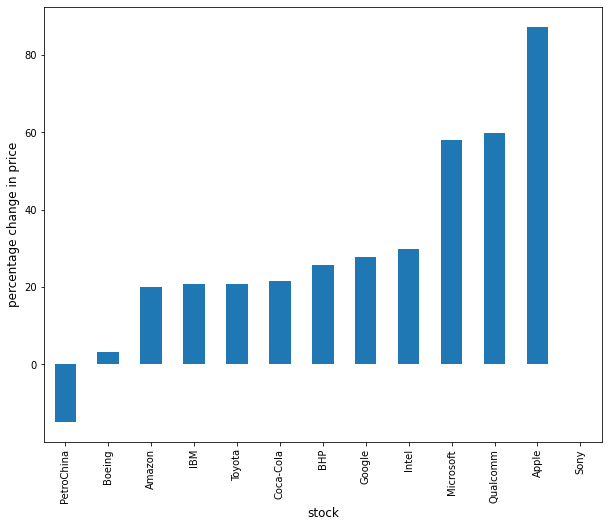

In [41]:
price_change.sort_values(inplace=True)
price_change = price_change.rename(index=ticker_list)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_xlabel('stock', fontsize=12)
ax.set_ylabel('percentage change in price', fontsize=12)
price_change.plot(kind='bar', ax=ax)
plt.show()

## Solution to[ Exercise 14.2](https://python-programming.quantecon.org/#pd_ex2)

Following the work you did in Exercise 14.1, you can query the data using `read_data` by updating the start and end dates accordingly.

In [42]:
indices_data = read_data(
        indices_list,
        start=dt.datetime(1971, 1, 1),  #Common Start Date
        end=dt.datetime(2020, 12, 31)
)

Then, extract the first and last set of prices per year as DataFrames and calculate the yearly returns such as:

In [43]:
yearly_returns = pd.DataFrame()

for index, name in indices_list.items():
    p1 = indices_data.groupby(indices_data.index.year)[index].first()  # Get the first set of returns as a DataFrame
    p2 = indices_data.groupby(indices_data.index.year)[index].last()   # Get the last set of returns as a DataFrame
    returns = (p2 - p1) / p1
    yearly_returns[name] = returns

yearly_returns

,S&P 500,NASDAQ,Dow Jones,Nikkei
Date,,,,
1971,1.2e-01,1.4e-01,NaN,3.6e-01
1972,1.6e-01,1.8e-01,NaN,9.2e-01
1973,-1.8e-01,-3.2e-01,NaN,-1.8e-01
1974,-3.0e-01,-3.5e-01,NaN,-9.9e-02
1975,2.8e-01,2.8e-01,NaN,1.7e-01
1976,1.8e-01,2.5e-01,NaN,1.3e-01
1977,-1.1e-01,7.5e-02,NaN,-2.7e-02
1978,2.4e-02,1.3e-01,NaN,2.3e-01
1979,1.2e-01,2.8e-01,NaN,8.7e-02


Next, you can obtain summary statistics by using the method `describe`.

In [44]:
yearly_returns.describe()

,S&P 500,NASDAQ,Dow Jones,Nikkei
count,5.0e+01,5.0e+01,2.9e+01,5.0e+01
mean,8.8e-02,1.3e-01,8.7e-02,7.9e-02
std,1.6e-01,2.5e-01,1.4e-01,2.5e-01
min,-3.8e-01,-4.0e-01,-3.3e-01,-4.0e-01
25%,-4.6e-03,-1.2e-02,2.1e-02,-7.1e-02
50%,1.2e-01,1.4e-01,8.4e-02,8.2e-02
75%,2.0e-01,2.8e-01,2.1e-01,2.0e-01
max,3.4e-01,8.4e-01,3.3e-01,9.2e-01


Then, to plot the chart

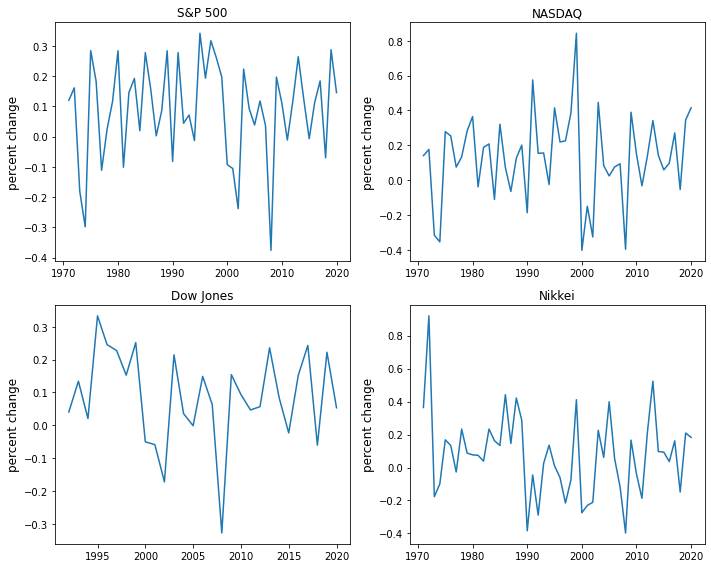

In [45]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))

for iter_, ax in enumerate(axes.flatten()):            # Flatten 2-D array to 1-D array
    index_name = yearly_returns.columns[iter_]         # Get index name per iteration
    ax.plot(yearly_returns[index_name])                # Plot pct change of yearly returns per index
    ax.set_ylabel("percent change", fontsize = 12)
    ax.set_title(index_name)

plt.tight_layout()

<p><a id=mung href=#mung-link><strong>[1]</strong></a> Wikipedia defines munging as cleaning data from one raw form into a structured, purged one.